In [10]:
import os
from astropy.table import Table
from astropy.stats import mad_std
from scipy.stats import sem
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
out_dir = 'results'

stamps_path = os.path.join(out_dir, 'postage_stamps.fits')
cat_real_path = os.path.join(out_dir, 'catalog_real.fits')
cat_mock_path = os.path.join(out_dir, 'catalog_mock.fits')
cat_param_path = os.path.join(out_dir, 'catalog_param.fits')


cat = Table.read(stamps_path)    
print("Done loading postage stamps")

m_real = Table.read(cat_real_path)
m_mock = Table.read(cat_mock_path)
m_param = Table.read(cat_param_path)
print("Done loading morphology statistics")

Done loading postage stamps
Done loading morphology statistics


In [12]:
# Remove offensive objects
mask = m_real['flag'] & m_mock['flag'] & m_param['flag']
mask &= m_real['flag_morph'] & m_mock['flag_morph'] & m_param['flag_morph'] 
mask &= ~isnan(m_real['M20']) & ~isnan(m_mock['M20']) & ~isnan(m_param['M20'])

m = mask

In [13]:
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2})

creal = plt.cm.viridis(0.1)
cmock = plt.cm.viridis(0.35)
cparam = plt.cm.viridis(0.8)

Mean real ellipticity: 0.2481 +/- 0.0014
Mean mock ellipticity: 0.2578 +/- 0.0014
Mean param ellipticity: 0.2520 +/- 0.0015
Mean real size: 0.1888 +/-0.0011
Mean mock size: 0.1901 +/-0.0010
Mean param size: 0.1854 +/-0.0011


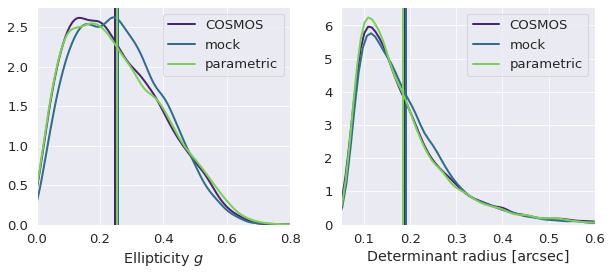

In [14]:
figure(figsize=(10,4))
subplot(121)

sns.distplot(m_real[mask]['g'], label='COSMOS', hist=False, color=creal);
axvline(mean(array(m_real[mask]['g'])), color=creal)
sns.distplot(m_mock[mask]['g'], label='mock', hist=False, color=cmock);
axvline(mean(array(m_mock[mask]['g'])), color=cmock)
sns.distplot(m_param[mask]['g'], label='parametric', hist=False, color=cparam);
axvline(mean(array(m_param[mask]['g'])), color=cparam)
xlim(0,0.8)
legend()
xlabel('Ellipticity $g$')
print("Mean real ellipticity: %0.4f +/- %0.4f"%(mean(array(m_real[mask]['g'])),
                                                sem(array(m_real[mask]['g']))))
print("Mean mock ellipticity: %0.4f +/- %0.4f"%(mean(array(m_mock[mask]['g'])),
                                                sem(array(m_mock[mask]['g']))))
print("Mean param ellipticity: %0.4f +/- %0.4f"%(mean(array(m_param[mask]['g'])),
                                                sem(array(m_param[mask]['g']))))

subplot(122)
res=0.03 # pixel scale in arcsec
sns.distplot(m_real[mask]['sigma_e']*res, label='COSMOS', hist=False, color=creal);
axvline(mean(array(m_real[mask]['sigma_e']*res)), color=creal)
sns.distplot(m_mock[mask]['sigma_e']*res, label='mock', hist=False, color=cmock);
axvline(mean(array(m_mock[mask]['sigma_e']*res)), color=cmock)
sns.distplot(m_param[mask]['sigma_e']*res, label='parametric', hist=False, color=cparam);
axvline(mean(array(m_param[mask]['sigma_e']*res)), color=cparam)
#title('Size distribution')
xlabel('Determinant radius [arcsec]')
xlim(0.05,0.6)
print("Mean real size: %0.4f +/-%0.4f"%(mean(array(m_real[mask]['sigma_e']*res)),
                                                sem(array(m_real[mask]['sigma_e']*res))))
print("Mean mock size: %0.4f +/-%0.4f"%(mean(array(m_mock[mask]['sigma_e']*res)),
                                                sem(array(m_mock[mask]['sigma_e']*res))))
print("Mean param size: %0.4f +/-%0.4f"%(mean(array(m_param[mask]['sigma_e']*res)),
                                                sem(array(m_param[mask]['sigma_e']*res))))

savefig("Figures/Figure_moments.pdf", bbox_inches = 'tight', pad_inches = 0)

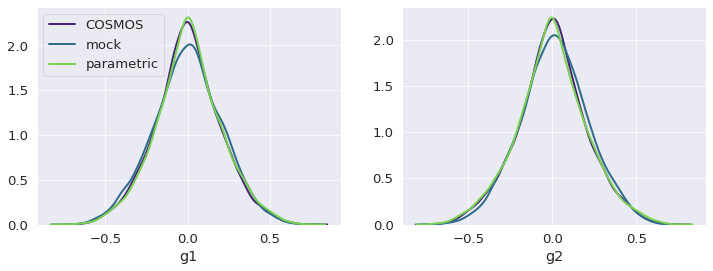

In [45]:
figure(figsize=(12,4))
subplot(121)

sns.distplot(m_real[mask]['g1'], label='COSMOS', hist=False, color=creal, bins=np.linspace(-0.75,0.75,100));
sns.distplot(m_mock[mask]['g1'], label='mock', hist=False, color=cmock, bins=np.linspace(-0.75,0.75,100));
sns.distplot(m_param[mask]['g1'], label='parametric', hist=False, color=cparam, bins=np.linspace(-0.75,0.75,100));
legend(loc=2)
subplot(122)

sns.distplot(m_real[mask]['g2'], label='COSMOS', hist=False, color=creal, bins=np.linspace(-0.75,0.75,100));
sns.distplot(m_mock[mask]['g2'], label='mock', hist=False, color=cmock, bins=np.linspace(-0.75,0.75,100));
sns.distplot(m_param[mask]['g2'], label='parametric', hist=False,  color=cparam, bins=np.linspace(-0.75,0.75,100));
legend().remove()

savefig("Figures/Figure_g1_g2.pdf", bbox_inches = 'tight', pad_inches = 0)

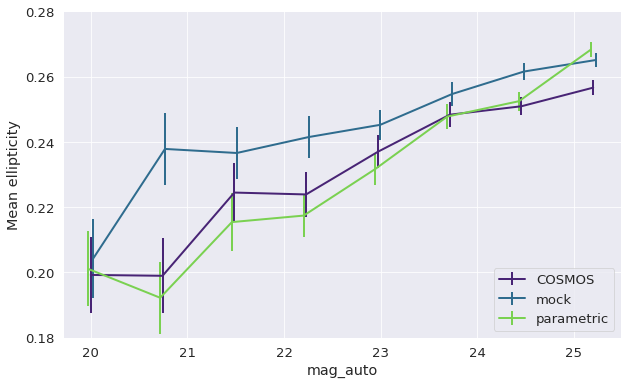

In [7]:
figure(figsize=(10,6))

err_rel = m_real['g'][m] 
n = 8
b = linspace(20,25.2,n)
inds = digitize(cat['mag_auto'][m], b)
res_m = zeros(n)
res_std = zeros(n)
for i in range(n):
    res_m[i] = mean(array(err_rel[inds == i]))
    res_std[i] = sem(array(err_rel[inds == i]))
errorbar(b,res_m, res_std, color=creal, label='COSMOS')

err_rel = m_mock['g'][m] 
n = 8
b = linspace(20,25.2,n)
inds = digitize(cat['mag_auto'][m], b)
res_m = zeros(n)
res_std = zeros(n)
for i in range(n):
    res_m[i] = mean(array(err_rel[inds == i]))
    res_std[i] = sem(array(err_rel[inds == i]))
errorbar(b+0.025,res_m, res_std, color=cmock, label='mock')
xlabel('mag_auto')
ylabel('Mean ellipticity')
ylim(0.1,0.3)


err_rel = m_param['g'][m] 
n = 8
b = linspace(20,25.2,n)
inds = digitize(cat['mag_auto'][m], b)
res_m = zeros(n)
res_std = zeros(n)
for i in range(n):
    res_m[i] = mean(array(err_rel[inds == i]))
    res_std[i] = sem(array(err_rel[inds == i]))
errorbar(b-0.025,res_m, res_std, color=cparam, label='parametric')

legend(loc=4)
ylim(0.180,0.28)

savefig("Figures/Figure_moments_magauto.pdf", bbox_inches = 'tight', pad_inches = 0)

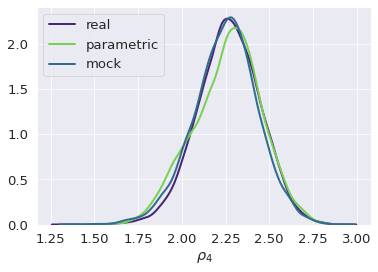

In [8]:
# Overall distribution of rho4
sns.distplot(m_real['rho4'][m], label='real', color=creal, hist=False );
sns.distplot(m_param['rho4'][m], label='parametric',color=cparam, hist=False);
sns.distplot(m_mock['rho4'][m],  label='mock', color=cmock,hist=False);
legend()
xlabel(r'$\rho_4$')
savefig("Figures/Figure_rho4.pdf", bbox_inches = 'tight', pad_inches = 0)

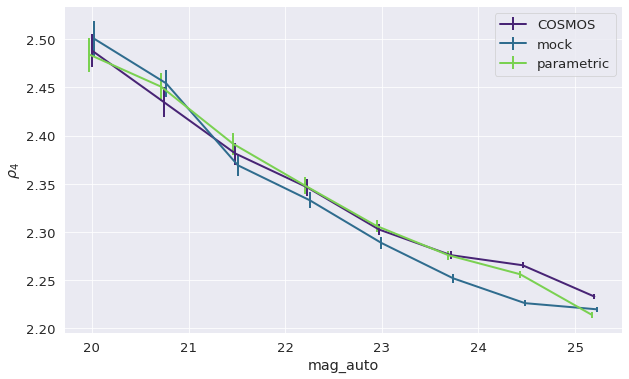

In [9]:
figure(figsize=(10,6))

err_rel = m_real['rho4'][m] 
n = 8
b = linspace(20,25.2,n)
inds = digitize(cat['mag_auto'][m], b)
res_m = zeros(n)
res_std = zeros(n)
for i in range(n):
    res_m[i] = mean(array(err_rel[inds == i]))
    res_std[i] = sem(array(err_rel[inds == i]))
errorbar(b,res_m, res_std, color=creal, label='COSMOS')

err_rel = m_mock['rho4'][m] 
n = 8
b = linspace(20,25.2,n)
inds = digitize(cat['mag_auto'][m], b)
res_m = zeros(n)
res_std = zeros(n)
for i in range(n):
    res_m[i] = mean(array(err_rel[inds == i]))
    res_std[i] = sem(array(err_rel[inds == i]))
errorbar(b+0.025,res_m, res_std, color=cmock, label='mock')
xlabel('mag_auto')
ylabel(r'$\rho_4$')

err_rel = m_param['rho4'][m] 
n = 8
b = linspace(20,25.2,n)
inds = digitize(cat['mag_auto'][m], b)
res_m = zeros(n)
res_std = zeros(n)
for i in range(n):
    res_m[i] = mean(array(err_rel[inds == i]))
    res_std[i] = sem(array(err_rel[inds == i]))
errorbar(b-0.025,res_m, res_std, color=cparam, label='parametric')

legend()
savefig("Figures/Figure_rho4_magauto.pdf", bbox_inches = 'tight', pad_inches = 0)